In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [2]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0].replace("\n", ""))
        temp.append(fulllines[2].replace("\n", ""))
        co2.append(fulllines[1].replace("\n", ""))
        sea_ice_ext.append(fulllines[4].replace("\n", ""))
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [56]:
#make new list of pH data without the NaN values
dict_ph={'Time': times, 'ph': phs} #make dictionary of time and ph
dfph1 = pd.DataFrame(dict_ph) #make dataframe
dfph1.dropna(inplace=True) #remove rows with NaN values
#write the ph and times to lists with no NaN values
phs_2 = dfph1['ph'].tolist() 
timeph = dfph1['Time'].tolist()

#make new ph dataset without initial nan values and interpolate between other missing datapoints
dict_ph_2 = {'Time': times[117:], 'ph':phs[117:]}
dfph2 = pd.DataFrame(dictph)
dfph3 = dfph.interpolate()
ph_interp = dfph3['ph'].tolist() 
timeph2 = dfph3['Time'].tolist()

#make yearly ph dataset
n = 12.0
year=timeph2[::12]
ph_year = [sum(ph_interp[i:i+12])/n for i in range(0,len(ph_interp),12)]
year = year[:-1]
ph_y = ph_year[:-1]

In [71]:
#Can find the minimum and maximum values using min and max functions
#Can determine index of these values using the index function
vals=[]
dates=[]
vals.append(min(temps))
vals.append(min(co2s))
vals.append(min(sea_ice_exts))
vals.append(min(phs_2))
vals.append(max(temps))
vals.append(max(co2s))
vals.append(max(sea_ice_exts))
vals.append(max(phs_2))

temp_min = temps.index(min(temps))
co2_min = co2s.index(min(co2s))
ext_min = sea_ice_exts.index(min(sea_ice_exts))
pH_min = phs.index(min(phs_2))
temp_max = temps.index(max(temps))
co2_max = co2s.index(max(co2s))
ext_max = sea_ice_exts.index(max(sea_ice_exts))
pH_max = phs.index(max(phs_2))

dates.append(times[temp_min])
dates.append(times[co2_min])
dates.append(times[ext_min])
dates.append(times[pH_min])
dates.append(times[temp_max])
dates.append(times[co2_max])
dates.append(times[ext_max])
dates.append(times[pH_max])


In [7]:
#can also load the data as a pandas dataframe to calculate quantiles
dict = {'Time': times_y, 'CO2': co2s_y, 'Temp': temps_y, 'IceExt': sea_ice_exts_y}
df = pd.DataFrame(dict)
df2=df.set_index('Time')

dict_m = {'Time': times, 'CO2': co2s, 'Temp': temps, 'IceExt': sea_ice_exts, 'pH': phs}
dfm = pd.DataFrame(dict_m)
dfm2=dfm.set_index('Time')

dict_ph_3 = {'Time': year, 'pH': ph_y}
dfph_y = pd.DataFrame(dict_ph_3)
dfph_y2 = dfph_y.set_index('Time')

In [70]:
#datmin=dfm2.min()
#datmax=dfm2.max()
#ext_dat = (dfm2 == datmin) | (dfm2 == datmax)
#ext_dat_t=ext_dat.sum(axis=1)
#ext_dat_t_5 = ext_dat_t.groupby(ext_dat_t.index // 6).sum()
#times_y_5=['1979-1984','1984-1989','1989-1994','1994-1999','1999-2004','2004-2009','2009-2014','2014-2019','2019-2024']
#plt.bar(times_y_5,ext_dat_t_5)
#plt.xticks(times_y_5,rotation=45)
#plt.yticks([0,1,2])
#plt.ylabel('Number of Extreme Values')
#plt.xlabel('Years')
#plt.grid(axis='y')
#plt.title('Sum of Extreme Values for CO2, Temperature, Sea Ice Extent, and pH')

#max_t = max_dat.sum(axis=1)

In [60]:
dat10 = df2.quantile(.10)
dat90 = df2.quantile(.90)

datph10 = dfph_y2.quantile(.10)
datph90 = dfph_y2.quantile(.90)

In [62]:
l_dat = df2 < dat10
h_dat = df2 > dat90

l_dat_ph = dfph_y2 < datph10
h_dat_ph = dfph_y2 > datph90

,pH
Time,
1988.792,False
1989.792,False
1990.792,False
1991.792,False
1992.792,False
1993.792,False
1994.792,False
1995.792,False
1996.792,False


In [51]:
l_dat_t=l_dat.sum(axis=1)
l_dat_t_5=l_dat_t.groupby(l_dat_t.index // 5).sum()

h_dat_t=h_dat.sum(axis=1)
h_dat_t_5=h_dat_t.groupby(h_dat_t.index // 5).sum()

times_y_5=['1979-1984','1984-1989','1989-1994','1994-1999','19992004','2004-2009','2009-2014','2014-2019','2019-2024','2024']

In [52]:
len(l_dat_ph)

323

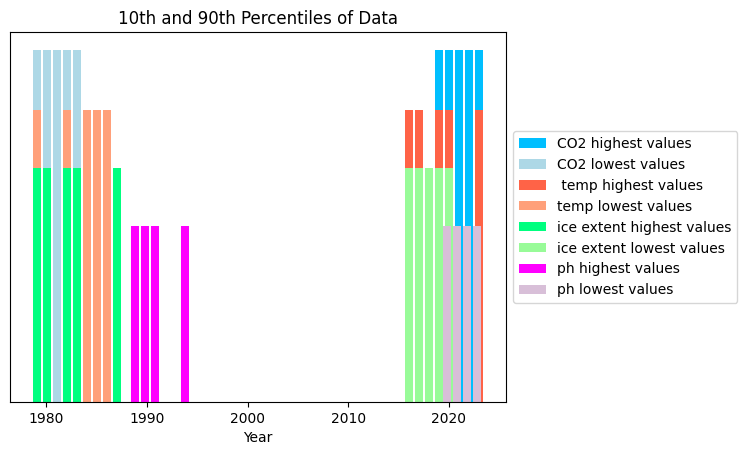

In [82]:
plt.bar(times_y,2*h_dat['CO2'],color='deepskyblue',label='CO2 highest values')
plt.bar(times_y,2*l_dat['CO2'],color='lightblue',label='CO2 lowest values')
plt.bar(times_y,1.66*h_dat['Temp'],color='tomato',label=' temp highest values')
plt.bar(times_y,1.66*l_dat['Temp'],color='lightsalmon',label='temp lowest values')
plt.bar(times_y,1.33*h_dat['IceExt'],color='springgreen',label='ice extent highest values')
plt.bar(times_y,1.33*l_dat['IceExt'],color='palegreen',label='ice extent lowest values')
plt.bar(year,h_dat_ph['pH'],color='magenta',label='ph highest values')
plt.bar(year,l_dat_ph['pH'],color='thistle',label='ph lowest values')

ax = plt.gca()
#hide x-axis
ax.get_yaxis().set_visible(False)
plt.xlabel('Year')
plt.title("10th and 90th Percentiles of Data")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('images/quantiles.pdf', dpi=300, bbox_inches='tight')